<a href="https://colab.research.google.com/github/Adedoyin-Bamidele/Data_science_demo_2025/blob/main/DNN_colab_().ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing libraries and
data**

In [1]:
pip install kagglehub

In [2]:
import kagglehub

path = kagglehub.dataset_download("iammustafatz/diabetes-prediction-dataset")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'diabetes-prediction-dataset' dataset.
Path to dataset files: /kaggle/input/diabetes-prediction-dataset


In [3]:
import os

os.listdir(path)


['diabetes_prediction_dataset.csv']

In [4]:
import pandas as pd

df = pd.read_csv(path + "/diabetes_prediction_dataset.csv")
df.head()


,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [6]:
df.smoking_history.value_counts()

,count
smoking_history,
No Info,35816
never,35095
former,9352
current,9286
not current,6447
ever,4004


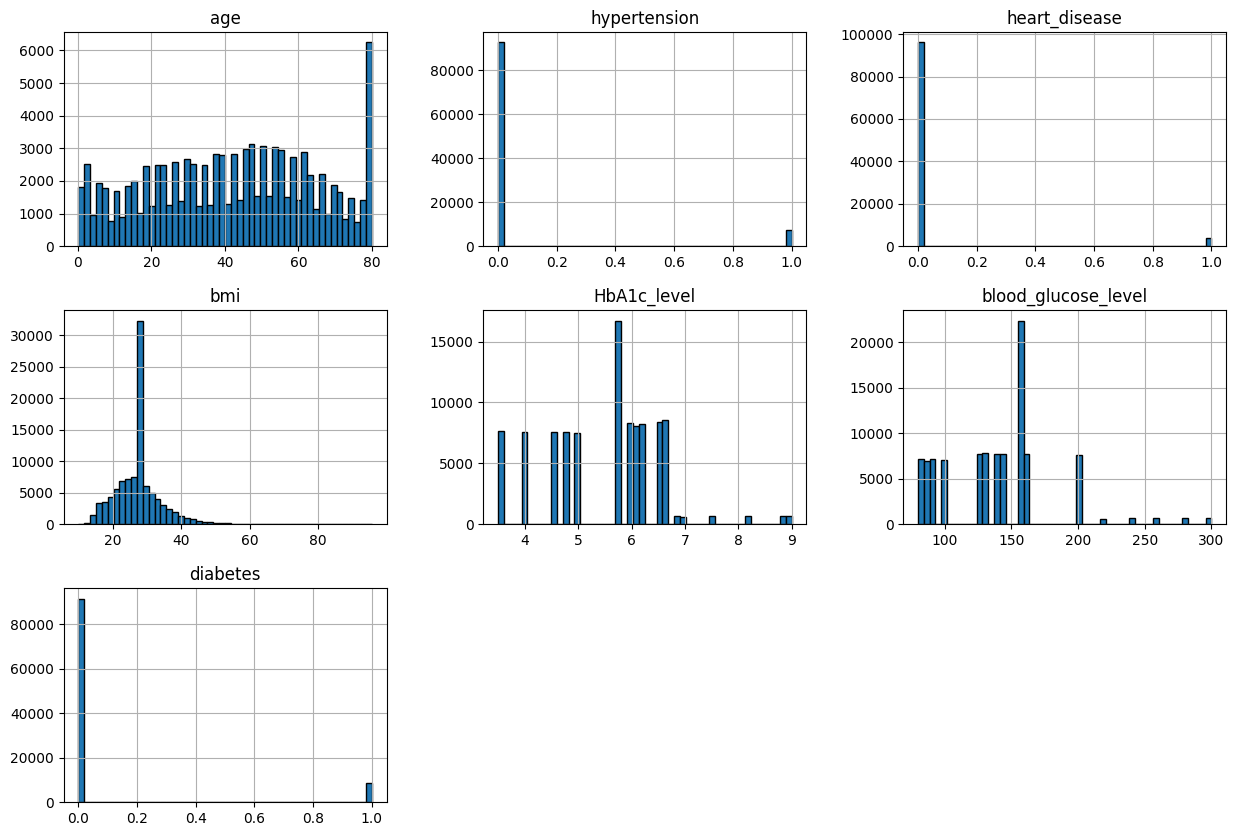

In [7]:
df.hist(figsize=(15,10), bins=50, edgecolor='black');

In [8]:
df.describe(include='all', percentiles=[0.01, 0.05, 0.1, 0.25, 0.5, 0.75, 0.9, 0.95, 0.99])

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000,100000.000000,100000.00000,100000.000000,100000,100000.000000,100000.000000,100000.000000,100000.000000
unique,3,NaN,NaN,NaN,6,NaN,NaN,NaN,NaN
top,Female,NaN,NaN,NaN,No Info,NaN,NaN,NaN,NaN
freq,58552,NaN,NaN,NaN,35816,NaN,NaN,NaN,NaN
mean,NaN,41.885856,0.07485,0.039420,NaN,27.320767,5.527507,138.058060,0.085000
std,NaN,22.516840,0.26315,0.194593,NaN,6.636783,1.070672,40.708136,0.278883
min,NaN,0.080000,0.00000,0.000000,NaN,10.010000,3.500000,80.000000,0.000000
1%,NaN,1.080000,0.00000,0.000000,NaN,14.600000,3.500000,80.000000,0.000000
5%,NaN,4.000000,0.00000,0.000000,NaN,16.820000,3.500000,80.000000,0.000000
10%,NaN,10.000000,0.00000,0.000000,NaN,19.180000,4.000000,85.000000,0.000000


In [9]:
df.gender.value_counts()

,count
gender,
Female,58552
Male,41430
Other,18


In [10]:
numeric_cols = df.select_dtypes(include=['int64','int32','float64','float32']).columns

for col in numeric_cols:
    print(col, df[col].corr(df['diabetes']))   # replace 'diabetes' with your label


age 0.25800803335609573
hypertension 0.19782324640804888
heart_disease 0.17172684954884976
bmi 0.21435740579951063
HbA1c_level 0.4006603146474886
blood_glucose_level 0.41955799602055444
diabetes 1.0


In [11]:
numeric_cols = df.select_dtypes(include=['int64','int32','float64','float32'])


<Axes: >

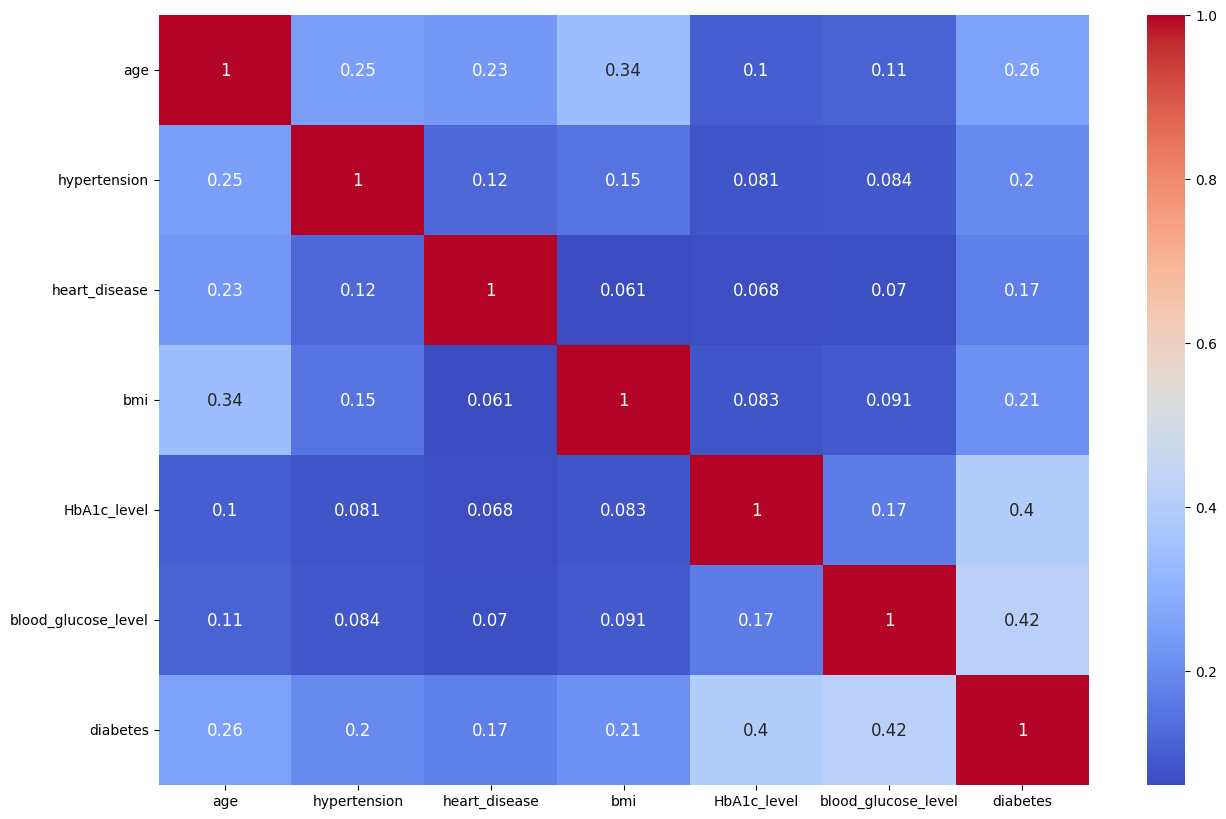

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
sns.heatmap(numeric_cols.corr(), annot=True, cmap='coolwarm', annot_kws = {'size':12})

In [13]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['gender'] = le.fit_transform(df['gender'])
df['smoking_history'] = le.fit_transform(df['smoking_history'])

In [14]:
from sklearn.model_selection import StratifiedShuffleSplit
X = df.drop('diabetes', axis=1)
y = df['diabetes']





In [15]:
pip install imblearn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 240.0/240.0 kB 8.7 MB/s eta 0:00:00


In [16]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset
from sklearn.preprocessing import StandardScaler
import numpy as np

In [17]:
from imblearn.over_sampling import ADASYN
adasyn = ADASYN(sampling_strategy='minority')
X_res, y_res = adasyn.fit_resample(X, y)
print(y_res.value_counts())

diabetes
1    92056
0    91500
Name: count, dtype: int64


In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.25, random_state=42)

In [19]:
test_datasetr = TensorDataset(torch.tensor(X_test.values, dtype=torch.float32), torch.tensor(y_test.values, dtype=torch.float32))
train_dataset = TensorDataset(torch.tensor(X_train.values, dtype=torch.float32), torch.tensor(y_train.values, dtype=torch.float32))

train_dataloader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_dataloader = DataLoader(test_datasetr, batch_size=32, shuffle=False)

In [20]:
input_dim = X_train.shape[1]
class DiabetesClassifier(nn.Module):
  def __init__(self, input_dim, layer_1, layer_2, layer_3):
        super().__init__()
        self.layer1 = nn.Linear(input_dim, layer_1)
        self.bn1 = nn.BatchNorm1d(layer_1)
        self.layer2 = nn.Linear(layer_1, layer_2)
        self.bn2 = nn.BatchNorm1d(layer_2)
        self.layer3 = nn.Linear(layer_2, layer_3)
        self.bn3 = nn.BatchNorm1d(layer_3)
        self.output = nn.Linear(layer_3, 1)

  def forward(self, x):
    x = torch.relu(self.bn1(self.layer1(x)))
    x = torch.relu(self.bn2(self.layer2(x)))
    x = torch.relu(self.bn3(self.layer3(x)))
    x = torch.sigmoid(self.output(x)) # Use sigmoid for binary classification output
    return x

In [21]:
def train_epoch (model, train_loader, loss_fn, optimizer, device):
  model.train()
  running_loss =0.0

  correct = 0
  total = 0
  for batch, (X_batch, y_batch) in enumerate(train_dataloader): # Corrected 'enumarate' to 'enumerate'
    optimizer.zero_grad()
    y_pred = model(X_batch)
    loss = loss_fn(y_pred, y_batch.unsqueeze(1)) # Changed 'criterion' to 'loss_fn'
    loss.backward()
    optimizer.step()

    running_loss += loss.item()
    predicted = (y_pred > 0.5).float() # Thresholding for binary classification
    total += y_batch.size(0)
    correct += (predicted == y_batch.unsqueeze(1)).sum().item() # Corrected to use y_batch
    if batch % 100 == 0 and batch >0:
      avg_loss = running_loss / 100
      accuracy = 100. * correct / total
      print(f'Batch {batch}, Loss: {avg_loss:.4f}, Accuracy: {accuracy:.2f}%')
      running_loss =0.0
      correct = 0
      total = 0

In [22]:
def evaluate (model, test_loader, loss_fn):
  model.eval()
  test_loss =0.0
  correct =0
  total =0
  with torch.no_grad():
    for data, target in test_loader:
      outputs = model(data)
      loss = loss_fn(outputs, target.unsqueeze(1)) # Unsqueeze target for BCELoss
      test_loss += loss.item()
      predicted = (outputs > 0.5).float().squeeze(1) # Threshold for binary classification and squeeze to match target shape
      total += target.size(0)
      correct += (predicted == target).sum().item()

  avg_loss = test_loss / len(test_loader)
  accuracy = 100. * correct / total
  print(f'Test Loss: {avg_loss:.4f}, Test Accuracy: {accuracy:.2f}%')
  return accuracy

In [23]:
from torch import optim

def objective(trial):
  layer_1 = trial.suggest_int('layer_1', 32, 256)
  layer_2 = trial.suggest_int('layer_2', 32, 256)
  layer_3 = trial.suggest_int('layer_3', 32, 256)

  optimizer_name = trial.suggest_categorical('optimizer', ['Adam', 'RMSprop', 'SGD'])
  lr = trial.suggest_float('lr', 1e-5, 1e-1, log=True)

  criterion = nn.BCELoss()

  model = DiabetesClassifier(
        input_dim=X_train.shape[1],
        layer_1=layer_1,
        layer_2=layer_2,
        layer_3=layer_3
    )
  if optimizer_name == "Adam":
    optimizer = optim.Adam(model.parameters(), lr=lr)
  elif optimizer_name == "RMSprop":
    optimizer = optim.RMSprop(model.parameters(), lr=lr)
  else:
    optimizer = optim.SGD(model.parameters(), lr=lr)

  # Add training and evaluation steps
  device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
  model.to(device)

  epochs = 10 # You can adjust the number of epochs for each trial
  for epoch in range(epochs):
      train_epoch(model, train_dataloader, criterion, optimizer, device)

  accuracy = evaluate(model, test_dataloader, criterion)
  return accuracy

In [24]:
pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 404.7/404.7 kB 11.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 248.6/248.6 kB 18.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 105.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 609.9/609.9 kB 47.2 MB/s eta 0:00:00


In [25]:
import optuna

study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=3)

print("Best params:", study.best_params)
print("Best accuracy:", study.best_value)


[I 2025-12-04 23:24:56,755] A new study created in memory with name: no-name-d68430c4-dcbb-4518-9fac-0de6134babad


Batch 100, Loss: 0.6962, Accuracy: 55.54%
Batch 200, Loss: 0.6754, Accuracy: 59.50%
Batch 300, Loss: 0.6628, Accuracy: 61.72%
Batch 400, Loss: 0.6512, Accuracy: 64.62%
Batch 500, Loss: 0.6373, Accuracy: 66.75%
Batch 600, Loss: 0.6283, Accuracy: 68.69%
Batch 700, Loss: 0.6219, Accuracy: 69.62%
Batch 800, Loss: 0.6067, Accuracy: 71.84%
Batch 900, Loss: 0.6023, Accuracy: 72.12%
Batch 1000, Loss: 0.5950, Accuracy: 72.97%
Batch 1100, Loss: 0.5928, Accuracy: 72.12%
Batch 1200, Loss: 0.5852, Accuracy: 74.44%
Batch 1300, Loss: 0.5711, Accuracy: 75.84%
Batch 1400, Loss: 0.5706, Accuracy: 75.81%
Batch 1500, Loss: 0.5712, Accuracy: 74.25%
Batch 1600, Loss: 0.5670, Accuracy: 75.16%
Batch 1700, Loss: 0.5583, Accuracy: 75.78%
Batch 1800, Loss: 0.5606, Accuracy: 75.09%
Batch 1900, Loss: 0.5453, Accuracy: 76.97%
Batch 2000, Loss: 0.5440, Accuracy: 77.06%
Batch 2100, Loss: 0.5379, Accuracy: 77.56%
Batch 2200, Loss: 0.5330, Accuracy: 77.03%
Batch 2300, Loss: 0.5405, Accuracy: 76.12%
Batch 2400, Loss: 0.

[I 2025-12-04 23:28:29,306] Trial 0 finished with value: 86.21674039530171 and parameters: {'layer_1': 239, 'layer_2': 229, 'layer_3': 229, 'optimizer': 'SGD', 'lr': 4.637628773008252e-05}. Best is trial 0 with value: 86.21674039530171.


Test Loss: 0.3353, Test Accuracy: 86.22%
Batch 100, Loss: 0.4004, Accuracy: 82.64%
Batch 200, Loss: 0.3437, Accuracy: 85.16%
Batch 300, Loss: 0.3385, Accuracy: 84.75%
Batch 400, Loss: 0.3221, Accuracy: 85.94%
Batch 500, Loss: 0.3334, Accuracy: 85.66%
Batch 600, Loss: 0.3139, Accuracy: 85.41%
Batch 700, Loss: 0.3037, Accuracy: 86.50%
Batch 800, Loss: 0.3156, Accuracy: 86.19%
Batch 900, Loss: 0.3131, Accuracy: 85.94%
Batch 1000, Loss: 0.3072, Accuracy: 86.78%
Batch 1100, Loss: 0.3110, Accuracy: 86.00%
Batch 1200, Loss: 0.3309, Accuracy: 84.75%
Batch 1300, Loss: 0.3105, Accuracy: 85.41%
Batch 1400, Loss: 0.3073, Accuracy: 85.78%
Batch 1500, Loss: 0.3079, Accuracy: 86.41%
Batch 1600, Loss: 0.3177, Accuracy: 85.44%
Batch 1700, Loss: 0.2944, Accuracy: 86.72%
Batch 1800, Loss: 0.2948, Accuracy: 87.84%
Batch 1900, Loss: 0.3083, Accuracy: 85.78%
Batch 2000, Loss: 0.2939, Accuracy: 86.94%
Batch 2100, Loss: 0.2997, Accuracy: 86.41%
Batch 2200, Loss: 0.2862, Accuracy: 87.25%
Batch 2300, Loss: 0.27

[I 2025-12-04 23:32:56,999] Trial 1 finished with value: 88.4656453616335 and parameters: {'layer_1': 172, 'layer_2': 145, 'layer_3': 187, 'optimizer': 'Adam', 'lr': 0.005500648622311231}. Best is trial 1 with value: 88.4656453616335.


Test Loss: 0.2534, Test Accuracy: 88.47%
Batch 100, Loss: 0.4241, Accuracy: 80.57%
Batch 200, Loss: 0.3410, Accuracy: 85.03%
Batch 300, Loss: 0.3260, Accuracy: 85.59%
Batch 400, Loss: 0.3271, Accuracy: 85.19%
Batch 500, Loss: 0.3125, Accuracy: 85.88%
Batch 600, Loss: 0.3072, Accuracy: 86.44%
Batch 700, Loss: 0.3173, Accuracy: 85.53%
Batch 800, Loss: 0.3136, Accuracy: 86.28%
Batch 900, Loss: 0.3016, Accuracy: 86.91%
Batch 1000, Loss: 0.2961, Accuracy: 86.19%
Batch 1100, Loss: 0.3064, Accuracy: 86.06%
Batch 1200, Loss: 0.3133, Accuracy: 86.06%
Batch 1300, Loss: 0.2969, Accuracy: 86.84%
Batch 1400, Loss: 0.3091, Accuracy: 86.03%
Batch 1500, Loss: 0.2973, Accuracy: 87.00%
Batch 1600, Loss: 0.3038, Accuracy: 86.38%
Batch 1700, Loss: 0.2974, Accuracy: 86.69%
Batch 1800, Loss: 0.3017, Accuracy: 86.53%
Batch 1900, Loss: 0.2934, Accuracy: 86.91%
Batch 2000, Loss: 0.2995, Accuracy: 86.94%
Batch 2100, Loss: 0.3044, Accuracy: 86.53%
Batch 2200, Loss: 0.2862, Accuracy: 86.41%
Batch 2300, Loss: 0.30

[I 2025-12-04 23:36:53,021] Trial 2 finished with value: 88.30438667218723 and parameters: {'layer_1': 152, 'layer_2': 155, 'layer_3': 131, 'optimizer': 'RMSprop', 'lr': 0.0026161149737012044}. Best is trial 1 with value: 88.4656453616335.


Test Loss: 0.2542, Test Accuracy: 88.30%
Best params: {'layer_1': 172, 'layer_2': 145, 'layer_3': 187, 'optimizer': 'Adam', 'lr': 0.005500648622311231}
Best accuracy: 88.4656453616335


In [31]:
best = study.best_params


In [33]:
model = DiabetesClassifier(
    input_dim=input_dim,
    layer_1=best["layer_1"],
    layer_2=best["layer_2"],
    layer_3=best["layer_3"]
)
optimizer = torch.optim.Adam(model.parameters(), lr=best["lr"])
criterion = nn.BCELoss()

In [38]:
def evaluate (model, test_loader, loss_fn, device):
  model.eval()
  test_loss =0.0
  correct =0
  total =0
  with torch.no_grad():
    for data, target in test_loader:
      data, target = data.to(device), target.to(device)
      outputs = model(data)
      loss = loss_fn(outputs, target.unsqueeze(1)) # Unsqueeze target for BCELoss
      test_loss += loss.item()
      predicted = (outputs > 0.5).float().squeeze(1) # Threshold for binary classification and squeeze to match target shape
      total += target.size(0)
      correct += (predicted == target).sum().item()

  avg_loss = test_loss / len(test_loader)
  accuracy = 100. * correct / total
  print(f'Test Loss: {avg_loss:.4f}, Test Accuracy: {accuracy:.2f}%')
  return accuracy

In [40]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

num_epochs = 10
for epoch in range(num_epochs):
  print(f'Epoch {epoch+1}/{num_epochs}')
  train_epoch(model, train_dataloader, criterion, optimizer, device) # Added training step
  evaluate(model, test_dataloader, criterion, device)

Epoch 1/10
Batch 100, Loss: 0.4262, Accuracy: 80.11%
Batch 200, Loss: 0.3533, Accuracy: 83.69%
Batch 300, Loss: 0.3268, Accuracy: 86.06%
Batch 400, Loss: 0.2914, Accuracy: 87.19%
Batch 500, Loss: 0.3168, Accuracy: 86.06%
Batch 600, Loss: 0.3146, Accuracy: 85.53%
Batch 700, Loss: 0.3124, Accuracy: 86.28%
Batch 800, Loss: 0.2998, Accuracy: 87.16%
Batch 900, Loss: 0.3235, Accuracy: 85.59%
Batch 1000, Loss: 0.3109, Accuracy: 85.97%
Batch 1100, Loss: 0.3106, Accuracy: 85.91%
Batch 1200, Loss: 0.3035, Accuracy: 87.09%
Batch 1300, Loss: 0.3187, Accuracy: 86.22%
Batch 1400, Loss: 0.3062, Accuracy: 85.47%
Batch 1500, Loss: 0.3062, Accuracy: 86.81%
Batch 1600, Loss: 0.2969, Accuracy: 87.16%
Batch 1700, Loss: 0.3105, Accuracy: 85.31%
Batch 1800, Loss: 0.3101, Accuracy: 86.03%
Batch 1900, Loss: 0.3059, Accuracy: 86.84%
Batch 2000, Loss: 0.2817, Accuracy: 87.44%
Batch 2100, Loss: 0.2936, Accuracy: 86.53%
Batch 2200, Loss: 0.3084, Accuracy: 86.00%
Batch 2300, Loss: 0.3050, Accuracy: 85.88%
Batch 240